--Guilherme Frutuoso de Almeida--

guilhermefa@alu.ufc.br

#Esse documento colab refere-se ao primeiro modelo preditivo do desafio CIENTISTA DE DADOS

## O primeiro modelo será uma Árvore de Decisão para a tarefa classificação

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [70]:
df_train = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
dummies = pd.get_dummies(df_train["failure_type"])
df_train = df_train.drop("failure_type", axis='columns')
df_train = pd.concat([df_train, dummies], axis='columns')
df_train.head()

df_test = pd.read_csv("desafio_manutencao_preditiva_teste.csv")
df_test.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
0,446,L47625,L,297.5,308.6,1793,26.7,70
1,7076,L54255,L,300.7,310.5,1536,47.4,192
2,1191,L48370,L,297.2,308.4,1460,42.1,41
3,2618,L49797,L,299.4,309.1,1670,35.9,68
4,5067,L52246,L,304.1,313.1,1550,30.9,9


Pré-processamento dos dados

In [80]:
def data_prep(data_loc, test_or_train):
    raw_data = pd.read_csv(data_loc)

    if test_or_train == 0:
      dummies = pd.get_dummies(raw_data["failure_type"])
      raw_data = raw_data.drop("failure_type", axis='columns')
      merged = pd.concat([raw_data, dummies], axis='columns')
      merged = merged.to_numpy()
      np.random.shuffle(merged)

      x = merged[:, 3:8]
      y = merged[:, 8:]

      return(x, y)
    else:
      raw_data = raw_data.to_numpy()
      x = raw_data[:, 3:8]
      return x

In [81]:
x_train, y_train = data_prep("desafio_manutencao_preditiva_treino.csv", 0)
x_test = data_prep("desafio_manutencao_preditiva_teste.csv", 1)

x_train = x_train.astype('int')
y_train = y_train.astype('int')
x_test = x_test.astype('int')

from sklearn.utils.multiclass import type_of_target
type_of_target(y_train)

class_labels = np.argmax(y_train, axis=1)
print(class_labels)

[1 1 1 ... 1 1 1]


Definição de uma função para avaliar a acurácia e o erro quadrado médio do modelo 

In [54]:
def clf_compute_metrics(clf, subsets):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import mean_squared_error

    x_train, x_test, y_train, y_test = subsets

    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)

    acc = accuracy_score(y_test,pred)
    print("The accuracy of this model is: ", acc*100)

    mse = mean_squared_error(y_test, pred)
    print("The mean squared error of this model is: ", mse)

Definição do modelo utilizando a biblioteca Sklearn - Classificador Árvore de Decisão

In [20]:
from sklearn.tree import DecisionTreeClassifier

def dt_classifier():

    tree = DecisionTreeClassifier(criterion='gini', max_depth = 10, max_features= 'sqrt', min_samples_leaf = 1, min_samples_split = 10)

    return tree

A célula abaixo refere-se a uma divisão de dados para predição reduzida utilizando apenas o dataset treino, o repartindo em 4 subconjuntos

In [55]:
from sklearn.model_selection import train_test_split
def artificial_split_data():
    df = df_train.to_numpy()
    X = df[:, 3:8]
    y = df[:, 8:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    X_train = X_train.astype('int')
    X_test = X_test.astype('int')
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')

    return (X_train, X_test, y_train, y_test)

tree_clf = dt_classifier()
clf_compute_metrics(tree_clf, artificial_split_data())

The accuracy of this model is:  96.81962744207179
The mean squared error of this model is:  0.009844010298349236


Avaliação e evolução do modelo usando Cross-Validation

In [22]:
def model_evaluation(model):
  from sklearn.model_selection import StratifiedKFold
  kfold = StratifiedKFold(n_splits=50,
                          shuffle=True,
  random_state=1).split(x_train,
  class_labels)
  scores = []
  for k, (train, test) in enumerate(kfold):
    model.fit(x_train[train], y_train[train])
    score = model.score(x_train[test], y_train[test])
    scores.append(score) 
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(class_labels[train]), score))
  
  print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    
model_evaluation(tree_clf)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=50.
  warnings.warn(


Fold:  1, Class dist.: [  73 6306   51   62   12   29], Acc: 0.993
Fold:  2, Class dist.: [  73 6306   51   62   12   29], Acc: 0.970
Fold:  3, Class dist.: [  73 6306   51   62   12   29], Acc: 0.978
Fold:  4, Class dist.: [  73 6306   51   62   12   29], Acc: 0.963
Fold:  5, Class dist.: [  73 6306   51   62   12   29], Acc: 0.978
Fold:  6, Class dist.: [  73 6306   51   62   11   30], Acc: 0.963
Fold:  7, Class dist.: [  73 6306   51   62   11   30], Acc: 0.970
Fold:  8, Class dist.: [  73 6306   51   62   11   30], Acc: 0.963
Fold:  9, Class dist.: [  73 6306   51   62   11   30], Acc: 0.978
Fold: 10, Class dist.: [  73 6306   51   62   11   30], Acc: 0.948
Fold: 11, Class dist.: [  73 6306   51   62   11   30], Acc: 0.978
Fold: 12, Class dist.: [  73 6306   51   62   11   30], Acc: 0.963
Fold: 13, Class dist.: [  73 6306   51   62   11   30], Acc: 0.963
Fold: 14, Class dist.: [  73 6306   51   62   11   30], Acc: 0.978
Fold: 15, Class dist.: [  73 6306   51   62   11   30], Acc: 0

"Afinação" de modelo usando GridSearch para tunar os hiperparâmetros  

In [11]:
def tuning_hp(estimator):
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV

  parameters = {'criterion':["gini", "entropy"],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]}

  gridsearch = GridSearchCV(estimator, param_grid=parameters, cv=10,
                         scoring='accuracy', verbose=1)

  gridsearch.fit(x_train, y_train)

  print(gridsearch.best_params_)
  print(gridsearch.best_score_)

  #return gridsearch.best_params_

tuning_hp(tree_clf)

Fitting 10 folds for each of 396 candidates, totalling 3960 fits
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.972103137620379


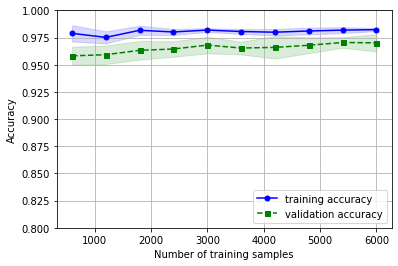

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
learning_curve(estimator=tree_clf,
X=x_train,
y=y_train,
train_sizes=np.linspace(
0.1, 1.0, 10),
cv=10,
n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
train_mean + train_std,
train_mean - train_std,
alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
color='green', linestyle='--',
marker='s', markersize=5,
label='validation accuracy')
plt.fill_between(train_sizes,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

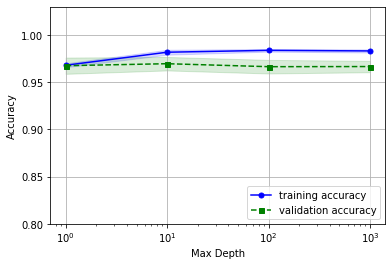

In [29]:
from sklearn.model_selection import validation_curve
param_range = [1.0, 10.0, 100.0, 1000.00]
train_scores, test_scores = validation_curve(
estimator=tree_clf,
X=x_train,
y=y_train,
param_name='max_depth',
param_range=param_range,
cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
train_mean - train_std, alpha=0.15,
color='blue')
plt.plot(param_range, test_mean,
color='green', linestyle='--',
marker='s', markersize=5,
label='validation accuracy')
plt.fill_between(param_range,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()

In [85]:
tree_clf.fit(x_train, y_train)
pred = tree_clf.predict(x_test)

print(x_train)
print(y_train)

id = df_test['udi']
prod_id = df_test['product_id']
pred = pd.DataFrame(pred)
x_test = pd.DataFrame(x_test)

pred.rename(columns={0:"Heat Dissipation Failure", 1:"No Failure", 2:"Overstrain Failure", 3:"Power Failure", 4:"Random Failures", 5:"Tool Wear Failure"}, inplace=True)
x_test.rename(columns={0:"air_temperature_k", 1:"process_temperature_k", 2:"rotational_speed_rpm", 3:"torque_nm", 4:"tool_wear_min"}, inplace=True)

predicts = pd.concat([id, prod_id, x_test, pred], axis='columns')

predicts.to_csv('predicts_h1.csv', index=False)

[[ 300  310 1455   40  172]
 [ 298  309 1417   41  155]
 [ 297  308 1596   37   30]
 ...
 [ 299  310 1534   37   10]
 [ 301  311 1522   35   63]
 [ 299  309 1511   47  148]]
[[0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 ...
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [88]:
df = pd.read_csv("predicts_h1.csv")
df.head()

,udi,product_id,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
0,446,L47625,297,308,1793,26,70,0,1,0,0,0,0
1,7076,L54255,300,310,1536,47,192,0,1,0,0,0,0
2,1191,L48370,297,308,1460,42,41,0,1,0,0,0,0
3,2618,L49797,299,309,1670,35,68,0,1,0,0,0,0
4,5067,L52246,304,313,1550,30,9,0,1,0,0,0,0
